# Support Vector Machines

- A short video to visually explain support vector machines : [SVM in 2minutes by Visually Explained](https://youtu.be/_YPScrckx28?si=9i_gASukStXkGg-Y)
- [Support Vector Machines: All you need to know!](https://youtu.be/ny1iZ5A8ilA?si=Iyzx61Es3IU52Z0Z) by Intuitive Machine Learning
- [CS229 Lecture Notes on SVM by Andrew Ng](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf)


## What is SVM ?
Given a data matrix $X$ having $d$-features and $n$-observations, and $y$ of size $n$ which has the corresponding class label for each observation, Support vector Machine is an algorithm to find a hyperplane in order to separate the data in the given classes.

Optimization problem in SVM is as follows:
$$\begin{align}
    \min_{w,b} \quad & \dfrac{1}{2} \lVert x \rVert^2\\
    \textrm{s.t.} \quad & y^{(i)}(w^Tx^{(i)}+b) \geq 1 \quad \text{for} \quad i=1, \dots,n \\
\end{align}$$
where,  
- $w$ is the weight vector
- $b$ is bias
- $\lVert w \rVert$ represents the $L_2$ norm of weight vector

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

## Initializing Dataset

In [2]:
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

In [3]:
d, n = X.shape # d-features and n-observations
d, n

(2, 20)

### Visualizing the data

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']


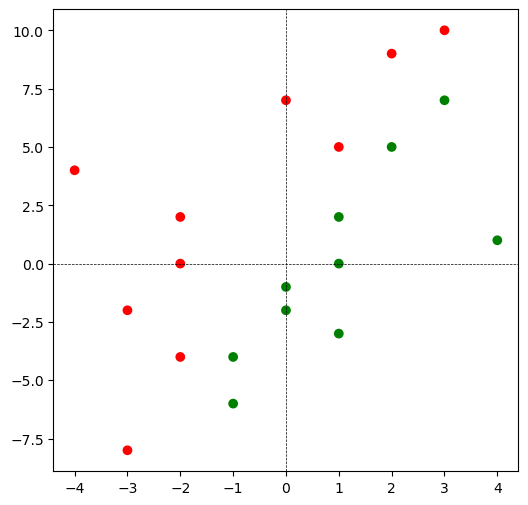

In [4]:
y_color = np.where(y == 1, 'green', 'red') # class with y=1 are marked as green, the other with red
print(y)
print(y_color)

plt.scatter(X[0, :], X[1, :], c = y_color) # X[0,:],X[1,:] give the first column elements 
                                           # and second column elements respectively

plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5);
plt.show()

### Linear Separability using Perceptron Algorithm
In the following cell, linear separability of the data is checked using Perceptron Algorithm as a preliminary step.

We initialize `w`as zero vector, so in the first epoch `w.T @ X[:, i]` will be equal to zero for all `i`, and so the code will predict class 1 for all points. In each epoch the weight vector is updated whenever we see an incorrectly predicted point using following formula: $$w_j \leftarrow w_j + X_j^{(i)} \cdot y^{(i)} \quad \text{where $j$ is feature index and $i$ is observation index}$$ 

If the data is linearly separable, eventually we will have `number of correctly predicted points = number of observations` and thats when the `while` loop ends and we get our final weight vector. However, if the data is not linearly separable, the `while` loop can run indefinitely, so setting a limit to number of epochs may help depending on data, say 1000 epochs in this case.

In [5]:
correct = 0
i = 0
w = np.zeros(d)
epochs = 0
while correct != n:
    # print(f'currently at data-point {i + 1}') # uncommented if needed
    
    # prediction
    y_hat = 1 if w.T @ X[:, i] >= 0 else -1
    
    # check for incorrect predictions
    if y[i] != y_hat:
        w += X[:, i] * y[i]
        correct = 0 # correct is reset to 0 when an incorrect prediction is met
    else:
        correct += 1
    i += 1
    
    # cycle back
    if i == n:
        i = 0
        epochs += 1

print(f'converges in {epochs} epochs')
w /= np.linalg.norm(w)
w

converges in 4 epochs


array([ 0.94174191, -0.3363364 ])

In the following code we visualize the weight vector found above using perceptron learning.  
- Equation of a line is given as $y=mx+c$
- Here slope will be given as $m = - \dfrac{w[0]}{w[1]}$

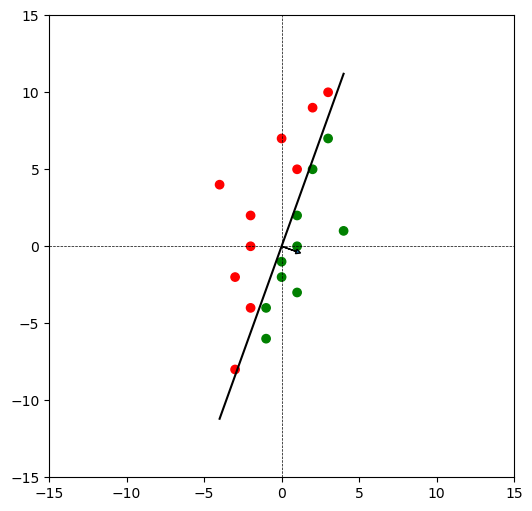

In [6]:
plt.scatter(X[0, :], X[1, :], c = y_color)
plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)

x_db = np.linspace(-4, 4) # generates evenly spaced points between -4 and 4 in x-axis
y_db = -w[0] / w[1] * x_db
plt.plot(x_db, y_db, color = 'black')
plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3) # the direction of weight vector
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

## SVM : Dual function and optimization

The Langrange form of the optimization problem in SVM can be given as:
$$ \begin{align}
\mathcal{L}(w,b,\alpha) = \dfrac{1}{2}\lVert w \rVert^2 - \sum_{i=1}^{n} \alpha^{(i)} \Big[ y^{(i)}\big(w^Tx^{(i)}+b\big)-1 \Big]
\end{align}$$
where $\alpha$ is the Lagrangian multiplier vector.  

The dual objective function can be given as:
$$\begin{align}
f(\alpha) = \sum_{i=1}^{n} \alpha^{(i)} - \dfrac{1}{2} \sum_{i=1}^{n}\sum_{j=1}^{n} \alpha^{(i)}\alpha^{(j)} y^{(i)}y^{(j)} (x^{(i)})^Tx^{(j)} 
\end{align}$$
where:
- $x^{(i)}$ represents feature vector corresponding to $i$-th observation

We will use a library to find optimal value $\alpha^*$ that maximizes $f(\alpha)$. Then we use it to find optimal weight vector as follows:
$$w^* = X^TY\alpha^*$$
where:
- $X$ is the data matrix
- $Y$ is the diagonal matrix where $Y_{ii}=y^{(i)}$
- $\alpha$ is the Lagrange multiplier vector

The dual objective function can also be represented as follows:
$$f(\alpha) = \alpha^T \mathbf{1}- \dfrac{1}{2}\alpha^T Q\alpha$$
where:
- $\mathbf{1}$ is the vector of ones.
- $Q = Y^T \cdot X^T \cdot X \cdot Y$ where $Y$ is diagonal matrix with $Y_{ii} = y^{(i)}$

In [7]:
# Costructing Y matrix
Y = np.diag(y)

# Constructing Q matrix
Q = Y.T @ X.T @ X @ Y

We will use SciPy library for finding optimal value of $\alpha$. However as ``optimize.minimze`` only minimizes a function, we inverse the sign of $f(\alpha)$ :
$$f_{new}(\alpha) = \dfrac{1}{2}\alpha^T Q\alpha -  \alpha^T \mathbf{1}$$
Minimizing $f_{new}(\alpha)$ is same as maximisation of $f(\alpha)$

In [8]:
def f(alpha):
    return 0.5 * alpha.T @ Q @ alpha - alpha.sum()

In [9]:
# optimization
from scipy import optimize
alpha_init = np.zeros(n)
res = optimize.minimize(f, alpha_init, bounds = optimize.Bounds(0, np.inf))

In [10]:
# optimal alpha
alpha_star = res.x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.642853  , 1.65713983, 1.67142524, 1.68571224,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428266, 1.62856644])

### Support and Boundary
- The support vectors are observations for which $\alpha^{(i)}>0$
- Decision boundary equation: $w^* \cdot x + b = 0$
- Supporting hyperplanes equation: $w^* \cdot x + b = \pm 1$

In [11]:
# extracting the support vectors
X_sup = X[:, alpha_star > 0]
y_sup = y[alpha_star > 0]
y_sup_color = np.where(y_sup == 1, 'green', 'red')

In [12]:
# optimal weight vector
w_star = X @ Y @ alpha_star
w_star

array([ 2.99998492, -1.00002465])

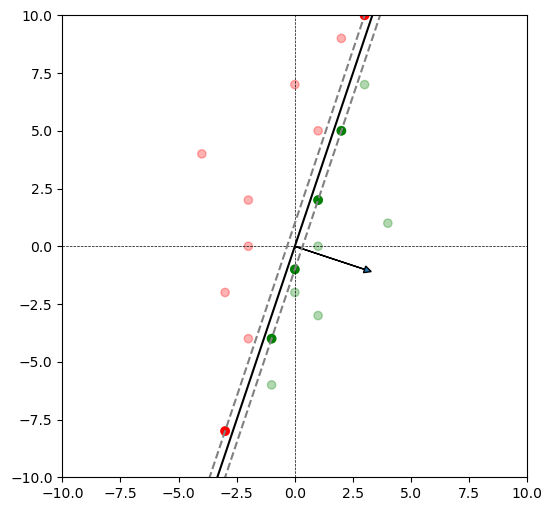

In [13]:
def plot_db(w):
    plt.scatter(X[0, :], X[1, :], c = y_color, alpha = 0.3) # plot of original data points, transparency 0.3
    plt.scatter(X_sup[0, :], X_sup[1, :], c = y_sup_color) # plot of support vector
    plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5) # horizontal dash line
    plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5) # vertical dash line
    x_db = np.linspace(-4, 4)
    y_db = -w[0] / w[1] * x_db
    
    # decision boundary
    plt.plot(x_db, y_db, color = 'black')
    
    # supporting hyperplanes
    y_sup_1 = 1 / w[1] - w[0] / w[1] * x_db
    y_sup_2 = -1 / w[1] - w[0] / w[1] * x_db
    
    plt.plot(x_db, y_sup_1, color = 'gray', linestyle = '--')
    plt.plot(x_db, y_sup_2, color = 'gray', linestyle = '--')
    plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3) # weight vector
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()
plot_db(w_star)

### Adapting for Soft Margin SVM


In [14]:
# Changed Dataset for soft margin SVM

X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1,
              1, 1])

In [15]:
d, n = X.shape
d, n

(2, 22)